# Calculating Trajectory of a Baseball

Using a throw height of 1.5m, and a horizontal speed of 40m/s (90mph)

## Plotting a line using initial data

In [1]:
# import csv

# print(z)

# row = []
# with open('D:\pro_dev\BaseballPitchVisual\Assets\data.csv', 'w') as f:
#     # using csv.writer method from CSV package
#     write = csv.writer(f)

#     for i in range(len(x)):
#         row = [z[i]-8,y[i]+1,x[i]-8]
#         write.writerow(row)

In [2]:
t0, tf = 0, 1 # Time in seconds
time = np.linspace(t0,tf,50)

# m, m/s, m/s^2
x0=0
xv0=30
xa=-.3
y0=1.5
yv0=8
ya=-9.8

x = []
y = []

# adding points in a line using kinematic equasion
for t in time:
    x.append(x0 + xv0*t + xa*np.power(t,2))
    y.append(y0 + yv0*t + ya*np.power(t,2))

Text(0, 0.5, 'Height (m)')

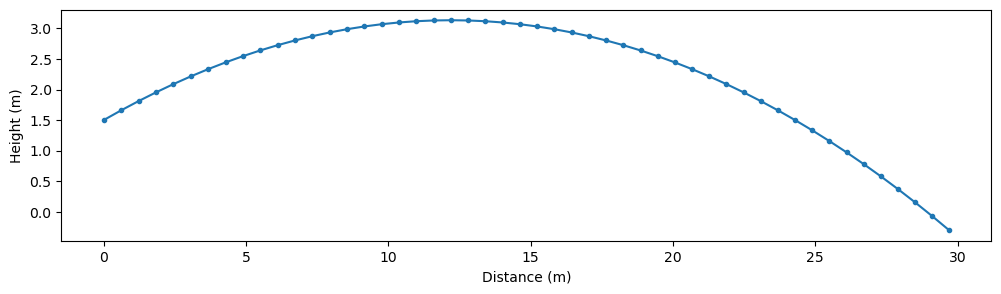

In [3]:
# y over x
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(x,y,".-")
ax2.set_xlabel("Distance (m)")
ax2.set_ylabel("Height (m)")

## Using Runge Kutta 4th

Using differential eqns, we can calculate position and apply forces that depend on speed (such as drag) accurately.

Drag from [engineersedge](https://www.engineersedge.com/fluid_flow/sphere_surface_drag_14044.htm):

$ F_d = \frac{1}{2}*\rho*v^2*C_d*A $

where: \
    $ \rho $ is the air density, \
    $ v $ is the velocity of the baseball relative to the air, \
    $ C_d $ is the drag coefficient, \
    $ A $ is the cross-sectional area of the baseball.

In [177]:
def drag(v):
    rho = 1.293
    radius = 0.03683
    A = radius**2 * np.pi
    C_d = 0.3
    return (.5 * rho * v**2 * C_d * A)


def rk4(f, x0=0, v0=0, t0=0.0, tf=10.0, dt=2**-5):
    r = np.array([x0,v0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    vpoints = []

    for t in tpoints:
        xpoints.append(r[0])
        vpoints.append(r[1])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
    return tpoints, xpoints, vpoints


In [5]:
# grav
def f(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = -9.81 
    return np.array([fy, fv], float)

In [172]:
# velocity in a vacuum, no gravity
def x_straight(r,t):
    y = r[0]
    v = r[1]
    fy = v
    fv = 0
    return np.array([fy, fv], float)

In [178]:
# velocity + force of drag
def x_lin(r,t):
    c = 0.3
    y = r[0]
    v = r[1]
    fy = v
    fv = - drag(v)
    return np.array([fy, fv], float)

# velocity + force of drag + force of gravity
def y_lin(r,t):
    c = 0.3
    g = -9.81
    y = r[0]
    v = r[1]
    fy = v
    fv = g-drag(v)
    return np.array([fy, fv], float)

# velocity + force of drag
def z_lin(r,t):
    c = 0.3
    y = r[0]
    v = r[1]
    fy = v
    fv = -drag(v)
    return np.array([fy, fv], float)

0.0 -0.21483170160388895 23.52187574843375


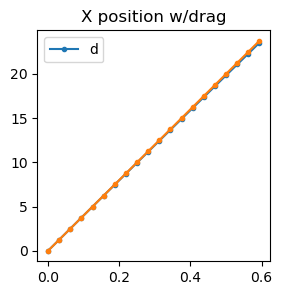

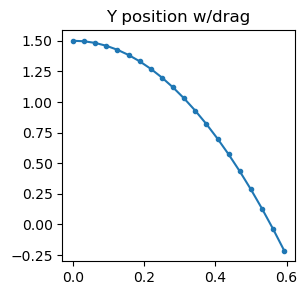

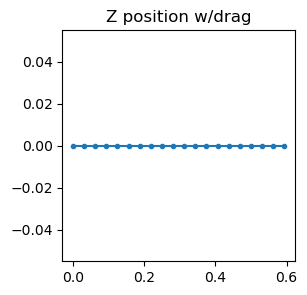

In [179]:
t,z,zv = rk4(x_lin, x0=0, v0=40, tf=.6)
st,sz,sxz = rk4(x_straight, x0=0, v0=40, tf=.6)
fig1, ax1 = plt.subplots(figsize=(3,3))
ax1.plot(t,z,".-")
ax1.plot(t,sz,".-")
ax1.legend("d")
ax1.set_title("X position w/drag")


t,y,yv = rk4(y_lin, x0=1.5, tf=.6)
fig0, ax0 = plt.subplots(figsize=(3,3))
ax0.plot(t,y,".-")
ax0.set_title("Y position w/drag")

t,x,xv = rk4(z_lin, v0=0, tf=.6)
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(t,x,".-")
ax.set_title("Z position w/drag")

print(x[-1], y[-1], z[-1])

Text(0, 0.5, 'Height (M)')

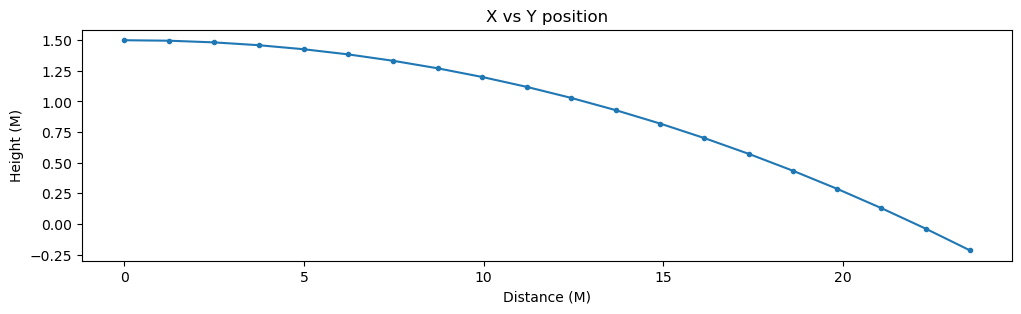

In [180]:
# y over x
fig2, ax2 = plt.subplots(figsize=(12,3))
ax2.plot(z,y,".-")
ax2.set_title("X vs Y position")
ax2.set_xlabel("Distance (M)")
ax2.set_ylabel("Height (M)")

Text(0.5, 0, 'Z-axis')

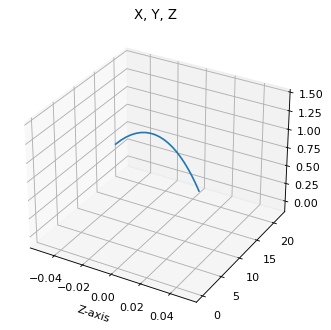

In [10]:
fig3 = plt.figure(dpi=80)
ax3 = fig3.add_subplot(projection='3d')
ax3.plot(0*t,z,y)
ax3.set_title("X, Y, Z")
ax3.set_xlabel('Z-axis')

# Introducing spin w/ Magnus Effect

Accodring to [Wikipedia](https://en.wikipedia.org/wiki/Magnus_effect), the correct equasion for force is:

$ F_a = \Delta p * A = c_a * \frac{\varrho}{2} (u^2_1 - u^2_2) * A $

where:
- $c_a$ is a scalar dependent on the shape and material of the rotating object
- $u$ is the speed of the fluid relative to each surface
- $\varrho$ is the fluid density
- $A$ cross-section area

what this means(2D):
- $c_a$ arbitraty constant(?): grip coefficient
- $u_1$ speed of baseball: 40 m/s
- $u_2$ speed of air - windspeed(?): 0 m/s
- $\varrho$ density of air: 1.293 kg*m^3
- $A$ Cross-section area of ball: 2.9in = 0.07366m (Avg) * $\pi$

X velocity start: 40.0 end: 8.68845549674662


Text(0.5, 1.0, 'Y vs time')

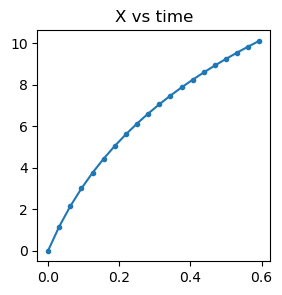

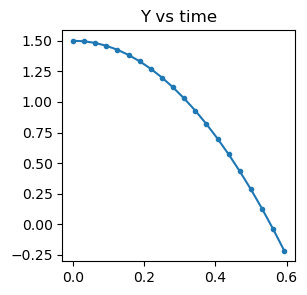

In [187]:
grip = 1
rpm_z = 2800 # assumed constant, range: 1000-2800
airV_x = 0
airV_y = 0
airRho = 1.293
radius = 0.03683

# Magnus effect only, no drag

def x_mag(r,t):
    c = 0
    c_a = grip
    A = radius * 2 * np.pi
    y = r[0]
    v = r[1]
    
#     rpm = rpm_z
#     omega = np.pi*2*(rpm/60) # angular velocity
#     # print("Omega:", omega)
#     u1 = omega*radius # linear velocity                  # Error: Misunderstood eqn!
#     # print("Linear V:", u1)
#     u2 = -v
    
#     fy = v
#     fv = -c*v - c_a*(airRho/2)*(u1-u2)*A

    
    # eqn corrected:
    fy = v
    fv = -c*v - c_a*(airRho/2)*(v**2-airV_x**2)*A
    
    return np.array([fy, fv], float)

def y_mag(r,t):
    c = 0
    g = -9.81
    y = r[0]
    v = r[1]
    fy = v
    fv = g-c*v - c_a*(airRho/2)*(v**2-airV_y**2)*A
    return np.array([fy, fv], float)

t,x,xv = rk4(x_mag, v0=40, tf=.6)
print("X velocity start:", xv[0], "end:", xv[-1])
fig, ax = plt.subplots(figsize=(3,3))
ax.plot(t,x,".-")
ax.set_title("X vs time")

t,y,yv = rk4(y_mag, x0=1.5, tf=.6)
fig0, ax0 = plt.subplots(figsize=(3,3))
ax0.plot(t,y,".-")
ax0.set_title("Y vs time")

Text(0, 0.5, 'Height (M)')

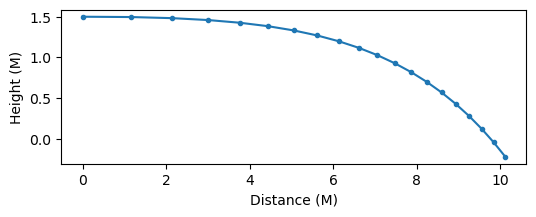

In [189]:
fig2, ax2 = plt.subplots(figsize=(6,2))
ax2.plot(x,y,".-")
ax2.set_xlabel("Distance (M)")
ax2.set_ylabel("Height (M)")

This is interesting looking, but *very wrong*. 

The magnus force is supposed to be applied perpendicular to the ball: so the velocity of x effects force on y, and the velocity of y effects force on x. I need to redo the RK4 to account for both dementions at once.

Also magnus force should depend on angular Velocity.

## Alt Mag force

From [engineer's edge](https://www.engineersedge.com/calculators/magnus_effect_calculator_15766.htm)

![image](..\data\magnus-ball.png)

$ F_M = \frac{1}{2} * C_L * \rho * A * v^2 $

Where 
$ A = \pi * R^2 $

And
$ S = R * \omega / v $ 
Which is roughly equivelent to $ C_L $


In [183]:
# Revised RK4:
def crk4traj(f, x0, vx0, y0, vy0, t0=0, tf=1, dt=2**-5):
    r = np.array([x0,vx0,y0,vy0], float) #init conditions

    tpoints = np.arange(t0,tf,dt)
    xpoints = []
    vxpoints = []
    ypoints = []
    vypoints = []

    for t in tpoints:
        xpoints.append(r[0])
        vxpoints.append(r[1])
        ypoints.append(r[2])
        vypoints.append(r[3])
        k1 = dt*f(r,t)
        k2 = dt*f(r+0.5*k1, t+0.5*dt)
        k3 = dt*f(r+0.5*k2, t+0.5*dt)
        k4 = dt*f(r+0.5*k3, t+0.5*dt)
        r = r + (k1+2*k2+2*k3+k4)/6
        # print(r)
    
    return xpoints, ypoints, tpoints


rpm = 2800 # In z direction, assumed constant, range: 1000-2800 for normal baseball pitches
airRho = 1.293
radius = 0.03683
g = 9.81


def calcMag(v):
    if v == 0:
        return 0
    else:
        A = radius**2 * np.pi
        omega = np.pi*2*(rpm/60) # angular velocity
        S = radius * omega / v # slip factor
        C_L = S # VERY rough equivelent for use case, really needs a lookup table.

        f_mag = 0.5*C_L*airRho*A*v**2
        return f_mag

def traj(r,t):
    x = r[0]
    vx = r[1]
    y = r[2]
    vy = r[3]
    
    f_magx = calcMag(vy) # takes y velocity for x
    f_magy = calcMag(vx) # takes x velocity for y
    
    fx = vx
    fvx = f_magx - drag(vx)
    fy = vy
    fvy = -g + f_magy - drag(vy)
    
    #print(f_magx)
    #print(f_magy, "total:", fvy)
    
    return np.array([fx, fvx, fy, fvy], float)

Text(0.5, 1.0, 'Y vs X')

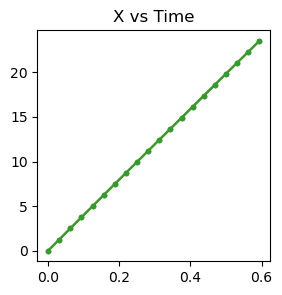

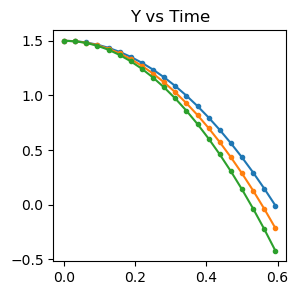

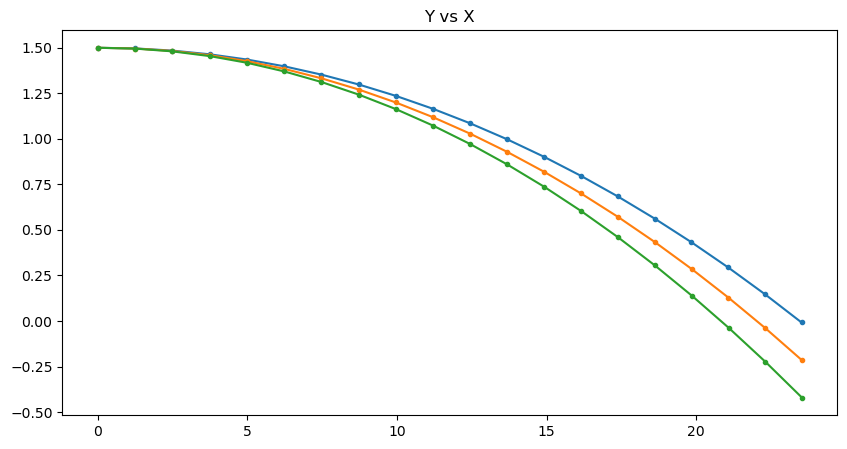

In [186]:
figm0, axm0 = plt.subplots(figsize=(3,3))
figm1, axm1 = plt.subplots(figsize=(3,3))
figm2, axm2 = plt.subplots(figsize=(10,5))
rpm = 2800
x,y,t = crk4traj(traj, 0.0, 40.0, 1.5, 0.0, tf=.6) # Backspin
axm0.plot(t,x,".-")
axm1.plot(t,y,".-")
axm2.plot(x,y,".-")
rpm = 0
x,y,t = crk4traj(traj, 0.0, 40.0, 1.5, 0.0, tf=.6) # No spin
axm0.plot(t,x,".-")
axm1.plot(t,y,".-")
axm2.plot(x,y,".-")
rpm = -2800
x,y,t = crk4traj(traj, 0.0, 40.0, 1.5, 0.0, tf=.6) # Topspin
axm0.plot(t,x,".-")
axm1.plot(t,y,".-")
axm2.plot(x,y,".-")

axm0.set_title("X vs Time")
axm1.set_title("Y vs Time")
axm2.set_title("Y vs X")

The only noticable deviation is in the Y direction, since that is (for most of the ball's flight) perpendicular to the velocity. When the ball is angled at all, like in a slider, then the difference becomes quite stark and nuanced.